<h3>Imports</h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h3>Conjunto de dados</h3>

In [3]:
car_evaluation = fetch_openml(name="car", version=3, parser='auto')
df = pd.DataFrame(data=car_evaluation.data, columns=car_evaluation.feature_names)
df['target'] = car_evaluation.target

print(df.head())

  buying  maint doors persons lug_boot safety target
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


<h2>Entedimento dos dados - exploração</h2>

<h3>Verifica se há valores ausentes</h3>

In [4]:
print("Valores Ausentes: ")
print(df.isnull().sum())

Valores Ausentes: 
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64


<p>Não há dados faltantes</p>

In [5]:
# Estatísticas descritivas para atributos numéricos
print(df.describe())

# Contagem de frequência para atributos categóricos
for column in df.columns:
    print(f'\n{column}:\n{df[column].value_counts()}')

       buying maint doors persons lug_boot safety target
count    1728  1728  1728    1728     1728   1728   1728
unique      4     4     4       3        3      3      4
top      high  high     2       2      big   high  unacc
freq      432   432   432     576      576    576   1210

buying:
buying
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

maint:
maint
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

doors:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons:
persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot:
lug_boot
big      576
med      576
small    576
Name: count, dtype: int64

safety:
safety
high    576
low     576
med     576
Name: count, dtype: int64

target:
target
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


<h2>Dados desbalanceados:</h2>

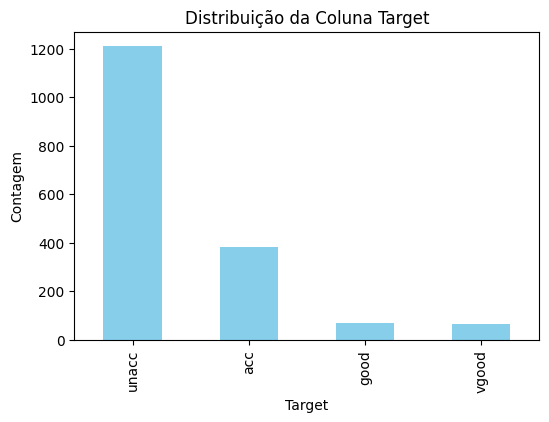

In [6]:
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição da Coluna Target')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

<p>Precisa de balanceamento pois há muitas classes unacceptable e acceptable</p>

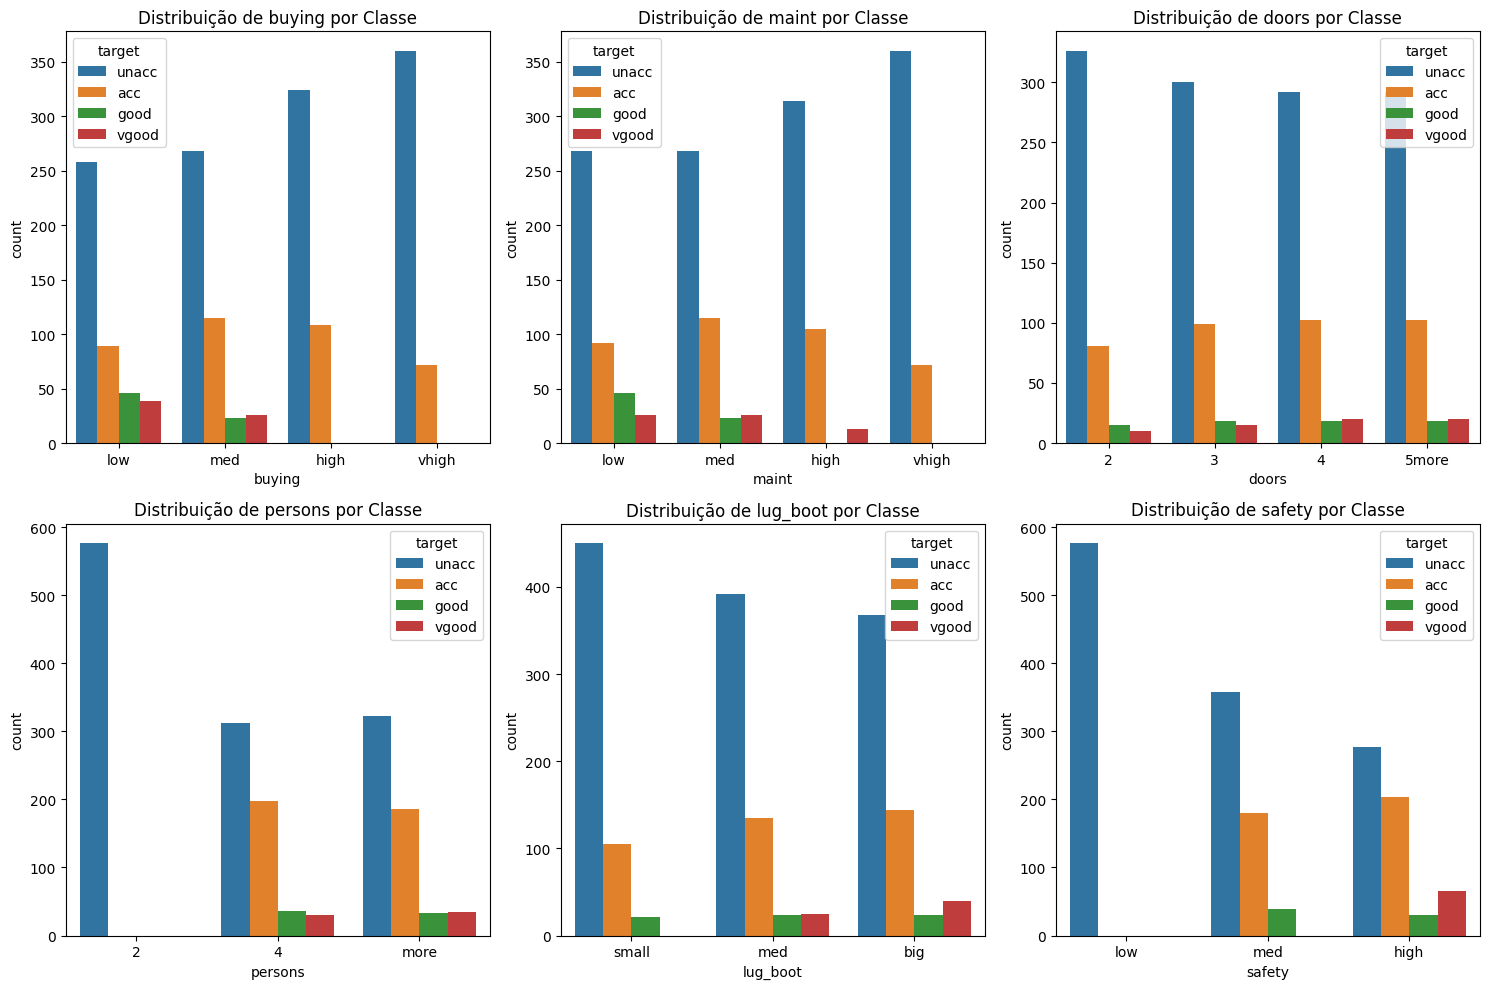

In [7]:
df['target'] = df['target'].cat.reorder_categories(['unacc', 'acc', 'good', 'vgood'], ordered=True)
df['buying'] = df['buying'].cat.reorder_categories(['low', 'med', 'high', 'vhigh'], ordered=True)
df['maint'] = df['maint'].cat.reorder_categories(['low', 'med', 'high', 'vhigh'], ordered=True)
df['lug_boot'] = df['lug_boot'].cat.reorder_categories(['small', 'med', 'big'], ordered=True)
df['safety'] = df['safety'].cat.reorder_categories(['low', 'med', 'high'], ordered=True)

plt.figure(figsize=(15, 10))

categorical_variables = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for i, var in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, hue='target', data=df)
    plt.title(f'Distribuição de {var} por Classe')

plt.tight_layout()
plt.show()


<h3>Balanceamento por Undersampling</h3>

In [8]:
df_majority_unacc = df_balanced[df_balanced['target'] == 'unacc']
df_minority_acc = df_balanced[df_balanced['target'] == 'acc']
df_minority_good = df_balanced[df_balanced['target'] == 'good']
df_minority_vgood = df_balanced[df_balanced['target'] == 'vgood']

undersample_size = min(len(df_minority_acc), len(df_minority_good), len(df_minority_vgood))

# Subamostrar as classes majoritárias
df_majority_unacc_undersampled = resample(df_majority_unacc, replace=False, n_samples=undersample_size, random_state=42)

# Combinar as classes majoritárias subamostradas com as classes minoritárias
df_balanced_undersampled = pd.concat([df_majority_unacc_undersampled, df_minority_acc, df_minority_good, df_minority_vgood])

# Embaralhar novamente o DataFrame
df_balanced_undersampled = df_balanced_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

NameError: name 'df_balanced' is not defined

In [ ]:
class_counts = df_balanced['target'].value_counts()

print("Contagem de instâncias por classe após o sobreamostragem:")
print(class_counts)

Contagem de instâncias por classe após o sobreamostragem:
unacc    1210
acc      1210
good     1210
vgood    1210
Name: target, dtype: int64


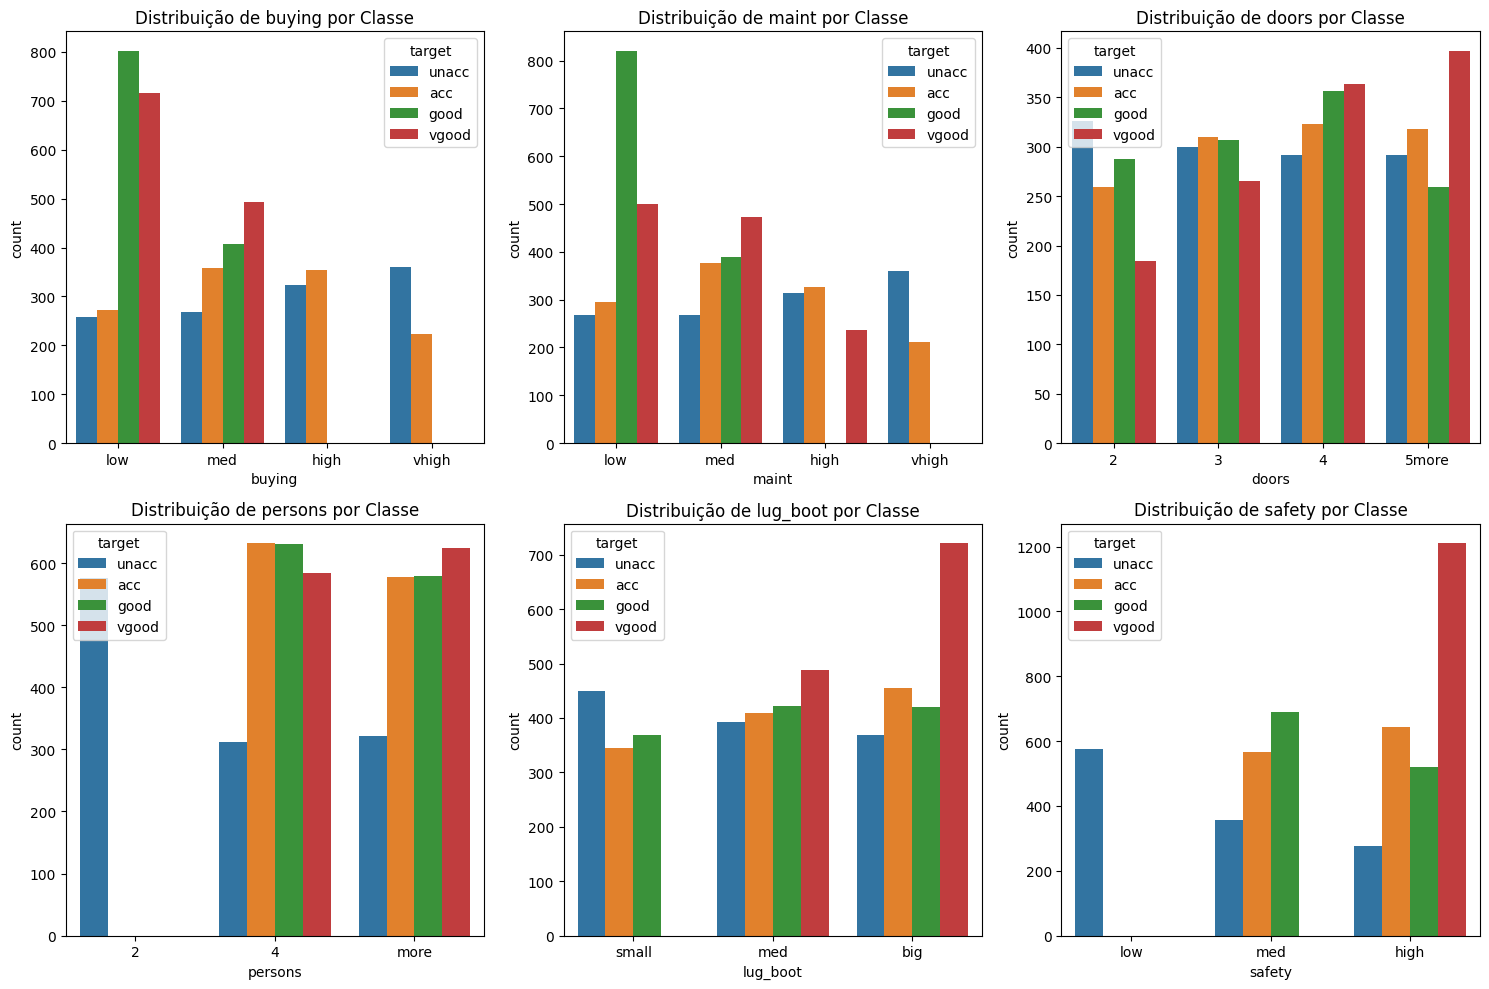

In [ ]:
df_balanced['target'] = df_balanced['target'].cat.reorder_categories(['unacc', 'acc', 'good', 'vgood'], ordered=True)
df_balanced['buying'] = df_balanced['buying'].cat.reorder_categories(['low', 'med', 'high', 'vhigh'], ordered=True)
df_balanced['maint'] = df_balanced['maint'].cat.reorder_categories(['low', 'med', 'high', 'vhigh'], ordered=True)
df_balanced['lug_boot'] = df_balanced['lug_boot'].cat.reorder_categories(['small', 'med', 'big'], ordered=True)
df_balanced['safety'] = df_balanced['safety'].cat.reorder_categories(['low', 'med', 'high'], ordered=True)

plt.figure(figsize=(15, 10))

categorical_variables = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for i, var in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, hue='target', data=df_balanced)
    plt.title(f'Distribuição de {var} por Classe')

plt.tight_layout()
plt.show()

In [ ]:
X = df_balanced.drop('target', axis=1)
y = df_balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

<h2>Random Forest</h2>

In [ ]:
rf_classifier.fit(X_train_encoded, y_train)

predictions_rf = rf_classifier.predict(X_test_encoded)

accuracy = accuracy_score(y_test, predictions_rf)
print(f'Acurácia: {accuracy:.4f}%')

print('\nRelatório de Classificação:')
print(classification_report(y_test, predictions_rf))

conf_matrix = confusion_matrix(y_test, predictions_rf)
print('\nMatriz de Confusão:')
print(conf_matrix)

Acurácia: 0.9917%

Relatório de Classificação:
              precision    recall  f1-score   support

         acc       0.97      1.00      0.99       236
        good       1.00      1.00      1.00       233
       unacc       1.00      0.97      0.98       265
       vgood       1.00      1.00      1.00       234

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968


Matriz de Confusão:
[[236   0   0   0]
 [  0 233   0   0]
 [  7   1 257   0]
 [  0   0   0 234]]


<h2>SVM</h2>

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_encoded, y_train)
predictions_svm = svm_classifier.predict(X_test_encoded)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'Acurácia do SVM: {accuracy_svm:.4f}%')

print('\nRelatório de Classificação do SVM:')
print(classification_report(y_test, predictions_svm))

conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
print('\nMatriz de Confusão do SVM:')
print(conf_matrix_svm)


Acurácia do SVM: 0.9928%

Relatório de Classificação do SVM:
              precision    recall  f1-score   support

         acc       0.98      1.00      0.99       236
        good       1.00      1.00      1.00       233
       unacc       1.00      0.97      0.99       265
       vgood       1.00      1.00      1.00       234

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968


Matriz de Confusão do SVM:
[[236   0   0   0]
 [  0 233   0   0]
 [  6   1 258   0]
 [  0   0   0 234]]
